# PHBS_MLF_2023 Homework 1 - Classifiers

In this homework, I will work on the [Give Me Some Credit](https://www.kaggle.com/competitions/GiveMeSomeCredit/data?select=cs-test.csv) dataset from Kaggle.

## Data Preprocessing

In [163]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [94]:
train_df = pd.read_csv("../data/cs-training.csv").iloc[:, 1:]

In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [96]:
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [97]:
train_df.fillna(train_df.mean(), inplace=True)

## Feature Selection

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

First, I transform the features by the method `StandardScalar().fit()` so that they are standardized in the sense that all transformed features and labels are of mean 0 and standard deviation 1.

In [99]:
X = train_df.iloc[:, 1:]
y = train_df.iloc[:, 0]
sc = StandardScaler()
sc.fit(X)
print(sc.mean_)
X_std = sc.transform(X)

[6.04843805e+00 5.22952067e+01 4.21033333e-01 3.53005076e+02
 6.67022124e+03 8.45276000e+00 2.65973333e-01 1.01824000e+00
 2.40386667e-01 7.57222268e-01]


Then, I run a logistic regression with $L1$ penalty in order to select the two most important features. Here, I traverse 30 different regularization parameters to determine when there's only two features left, and the result is visualized below.

In [100]:
weights, params = [], []
for c in np.linspace(-5, 1, 30):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='saga')
    lr.fit(X_std, y)
    weights.append(lr.coef_[0, :])
    params.append(10.**c)

weights = np.array(weights)

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zhouenze/opt/anaconda3/lib/p

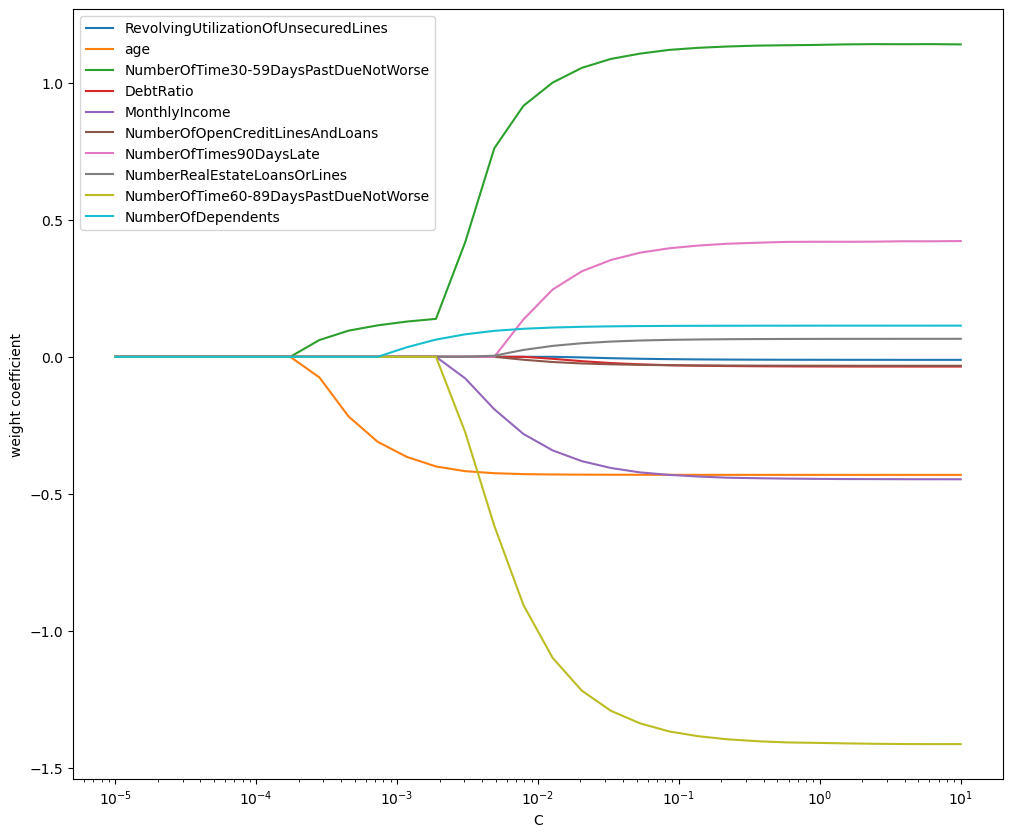

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
features = list(train_df.columns)[1:]
for i in range(10):
    plt.plot(params, weights[:, i], label=features[i])

plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend()
plt.xscale('log')
plt.show()

In [159]:
weights

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

`weights` is a 30 by 10 2-dimensional list

In [162]:
# calculate the number of non zero weight for different regularization parameter c
num_of_eff_feature = (weights != 0).sum(axis=1)
num_of_eff_feature

array([ 0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  3,  3,  5,  6,  8,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

We can see that the 8th c already gives 2 non zero weights.

In [161]:
# find out which c yield non zero weights
non_zero_weight_idx = np.nonzero(num_of_eff_feature)
non_zero_weight_idx

(array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26, 27, 28, 29]),)

In [103]:
weights[non_zero_weight_idx[0][0]] != 0

array([False,  True,  True, False, False, False, False, False, False,
       False])

In [104]:
extracted_features = train_df.iloc[:, 1:].loc[:, weights[non_zero_weight_idx[0][0]] != 0]
extracted_features

,age,NumberOfTime30-59DaysPastDueNotWorse
0,45,2
1,40,0
2,38,1
3,30,0
4,49,1
...,...,...
149995,74,0
149996,44,0
149997,58,0
149998,30,0


From the above cell, we can see that the two most important features are `age` and `NumberOfTime30-59DaysPastDueNotWorse`, which will be used as the features for next step analysis, so I extracted them out and create a new `DataFrame` called `extracted_features`.

## Model Building

First define a function (excerpted from PML Ch.3) to visualize the decision region.

In [105]:
from matplotlib.colors import ListedColormap
from distutils.version import LooseVersion
import matplotlib

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')

### Logistic Regression

Before feeding the data to models, I first performed standardization as before.

In [106]:
sc2 = StandardScaler()
sc2.fit(extracted_features)
extracted_features_std = sc2.transform(extracted_features)
extracted_features_std

array([[-0.49385982,  0.37659296],
       [-0.83234222, -0.10041896],
       [-0.96773518,  0.138087  ],
       ...,
       [ 0.38619443, -0.10041896],
       [-1.50930703, -0.10041896],
       [ 0.79237332, -0.10041896]])

Next thing to do is to split the dataset into training set and testing set.

In [107]:
from sklearn.model_selection import train_test_split

X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(extracted_features_std,
                                                                    y,
                                                                    test_size=0.3,
                                                                    random_state=42,
                                                                    stratify=y)

Finally, we're fitting a logistic regression model.

In [ ]:
from sklearn import metrics

In [166]:
accuracy_lr = []
recall_lr = []
params_lr = {}

for c in np.arange(-5, 5):
    lr = LogisticRegression(penalty='l2', C=10.**c)
    lr.fit(X_reduced_train, y_train)
    y_pred = lr.predict(X_reduced_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy_lr.append(acc)
    recall_lr.append(recall)
    C = 10.**c
    params_lr[(acc, recall)] = C

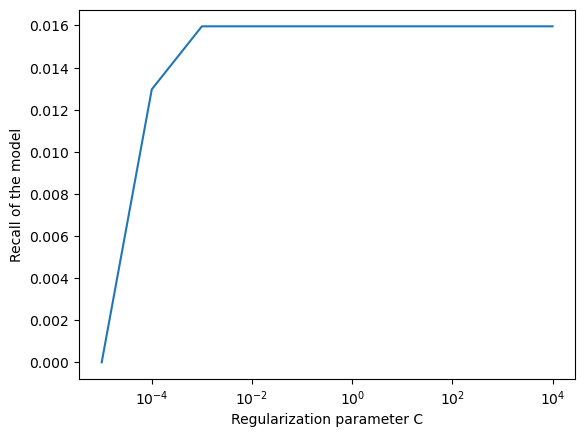

In [168]:
recall_df = pd.DataFrame(recall_lr, index=10.**np.arange(-5, 5))
fig, ax = plt.subplots()
plt.xlabel('Regularization parameter C')
plt.ylabel('Recall of the model')
recall_df.plot(logx=True, ax=ax)
plt.legend().set_visible(False)
plt.show()

We can see that after $C$ reach $0.1$, the recall wouldn't grow, so we can set $C=0.1$

In [169]:
lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_reduced_train, y_train)
y_pred = lr.predict(X_reduced_test)

In [170]:
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall: {}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.9333555555555556
Recall: 0.015957446808510637


We can also plot the confusion matrix and intuitively observe both recall and precision of the model. Actually, we can see that the recall (which is important in terms of default prediction) is actually low, indicating that logistic regression may not be a good model in this context.

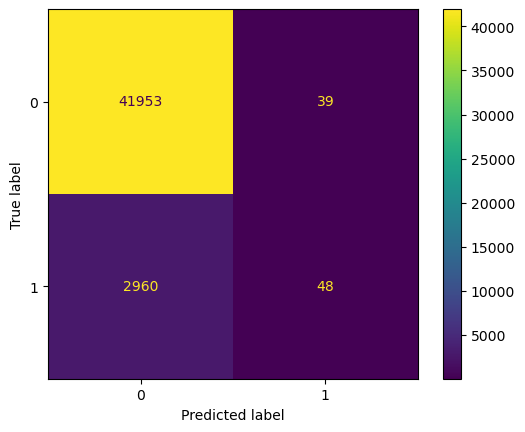

In [171]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Another measure is the ROC curve which I displayed below.

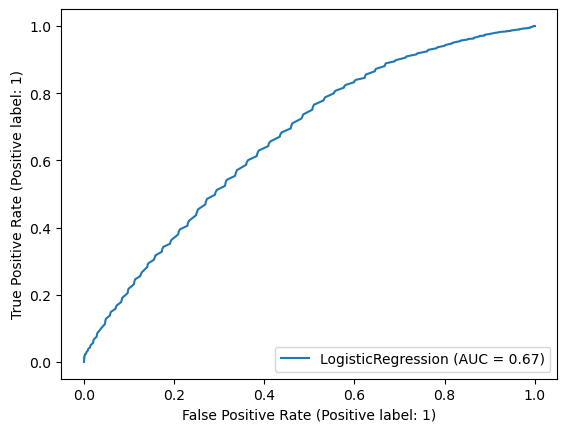

In [112]:
metrics.RocCurveDisplay.from_estimator(lr, X_reduced_test, y_test)

In [113]:
X_combined_std = np.vstack((X_reduced_train, X_reduced_test))
y_combined = np.hstack((y_train, y_test))

X_train_idx_end = len(X_reduced_train)
X_test_idx_end = len(X_reduced_test)

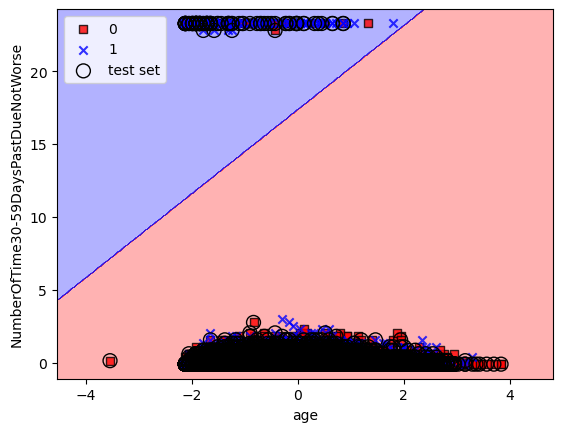

In [172]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(X_train_idx_end, len(X_combined_std)))

plt.xlabel(extracted_features.columns[0])
plt.ylabel(extracted_features.columns[1])
plt.legend(loc='upper left')
plt.show()

Finally, I plotted the decision region and observed that both classes are mixed in terms of the feature `NumberOfTime30-59DaysPastDueNotWorse`, so the bad model performance (low recall) may be due to lack of features, which leads to the condensation of the two classes.

### SVM

In [115]:
from sklearn.svm import SVC

#### Linear Kernel

In [175]:
accuracy_svm_lin = []
recall_svm_lin = []
params_svm_lin = {}

for c in np.arange(-2, 3):
    svm_lin = SVC(kernel='linear', C=10.**c, random_state=42, max_iter=100000, class_weight='balanced')
    svm_lin.fit(X_reduced_train, y_train)
    y_pred = svm_lin.predict(X_reduced_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy_svm_lin.append(acc)
    recall_svm_lin.append(recall)
    C = 10.**c
    params_svm_lin[(acc, recall)] = C

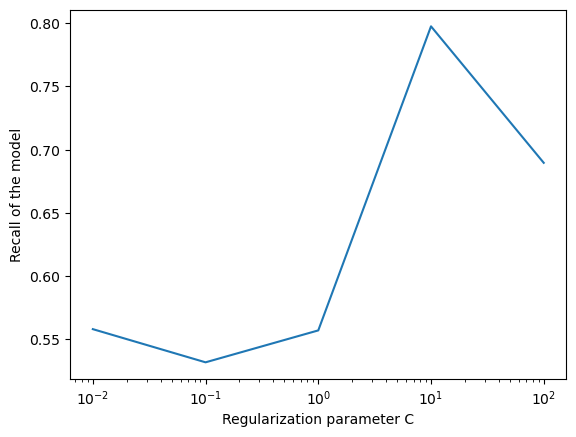

In [177]:
recall_df_svm_lin = pd.DataFrame(recall_svm_lin, index=10.**np.arange(-2, 3))
fig, ax = plt.subplots()
plt.xlabel('Regularization parameter C')
plt.ylabel('Recall of the model')
recall_df_svm_lin.plot(logx=True, ax=ax)
plt.legend().set_visible(False)
plt.show()

We can see that when $C=10$ the recall is the highest, so we set $C=10$ afterwards.

In [116]:
svm_lin = SVC(kernel='linear', C=10., random_state=42, max_iter=100000, class_weight='balanced')
svm_lin.fit(X_reduced_train, y_train)

/Users/zhouenze/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(class_weight='balanced', kernel='linear', max_iter=100000, random_state=42)

In [117]:
y_pred = svm_lin.predict(X_reduced_test)

In [118]:
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall: {}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.8096
Recall: 0.5568484042553191


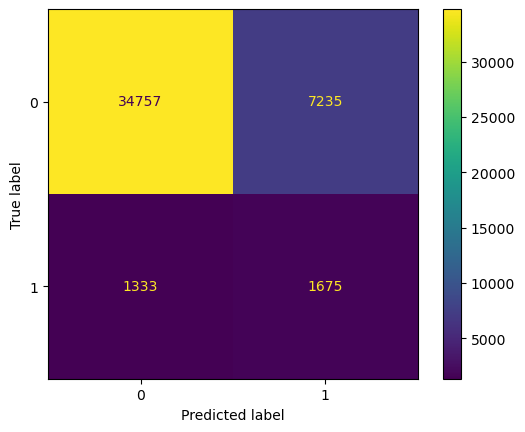

In [119]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

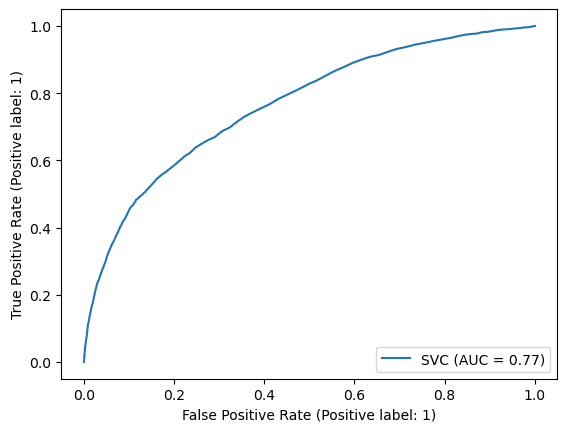

In [120]:
metrics.RocCurveDisplay.from_estimator(svm_lin, X_reduced_test, y_test)

/var/folders/gw/zkt1hnc96ws27g_xrt1hp51w0000gn/T/ipykernel_570/1789118986.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/gw/zkt1hnc96ws27g_xrt1hp51w0000gn/T/ipykernel_570/1789118986.py:38: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


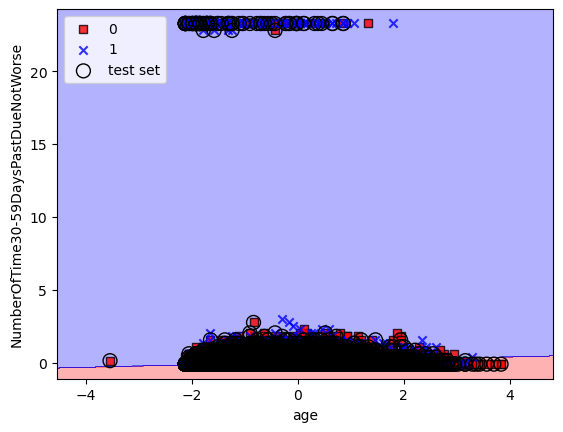

In [121]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm_lin, test_idx=range(X_train_idx_end, len(X_combined_std)))

plt.xlabel(extracted_features.columns[0])
plt.ylabel(extracted_features.columns[1])
plt.legend(loc='upper left')
plt.show()

#### `rbf` Kernel

In [179]:
accuracy_svm_rbf = []
recall_svm_rbf = []
params_svm_rbf = {}

for c in np.arange(-2, 3):
    for gamma in [0.1, 1.0, 10.0]:
        svm_rbf = SVC(kernel='rbf',
                      C=10.**c,
                      gamma=gamma,
                      random_state=42,
                      max_iter=100000,
                      class_weight='balanced')
        svm_rbf.fit(X_reduced_train, y_train)
        y_pred = svm_rbf.predict(X_reduced_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        accuracy_svm_rbf.append(acc)
        recall_svm_rbf.append(recall)
        C = 10.**c
        params_svm_rbf[recall] = (C, gamma)

In [180]:
print(params_svm_rbf)

C, gamma = params_svm_rbf[max(recall_svm_rbf)]
print("Parameter pair with highest recall (C, gamma): ({}, {})".format(C, gamma))

{0.5920877659574468: (0.01, 0.1), 0.6339760638297872: (0.01, 1.0), 0.6230053191489362: (0.1, 1.0), 0.6107047872340425: (0.1, 0.1), 0.6236702127659575: (0.1, 10.0), 0.574468085106383: (1.0, 0.1), 0.6153590425531915: (10.0, 1.0), 0.6200132978723404: (100.0, 10.0), 0.5674867021276596: (10.0, 0.1), 0.620345744680851: (10.0, 10.0), 0.625: (100.0, 0.1), 0.6220079787234043: (100.0, 1.0)}
Parameter pair with highest recall (C, gamma): (0.01, 1.0)


Since $(C=0.01, \gamma=1.0)$ gives the best recall in this setting, I will use that pair of parameters in the following. Note that $C$ here is $0.01$, which is different from that of the linear kernel where $C=10$.

In [181]:
svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42, max_iter=100000, class_weight='balanced')
svm_rbf.fit(X_reduced_train, y_train)

SVC(C=0.01, class_weight='balanced', gamma=1.0, max_iter=100000,
    random_state=42)

In [182]:
y_pred = svm_rbf.predict(X_reduced_test)

In [183]:
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall: {}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.7477333333333334
Recall: 0.6339760638297872


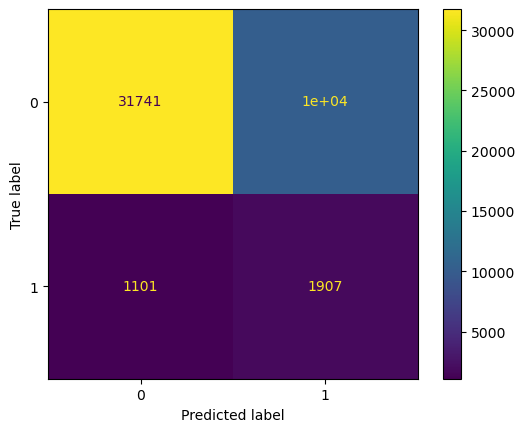

In [184]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

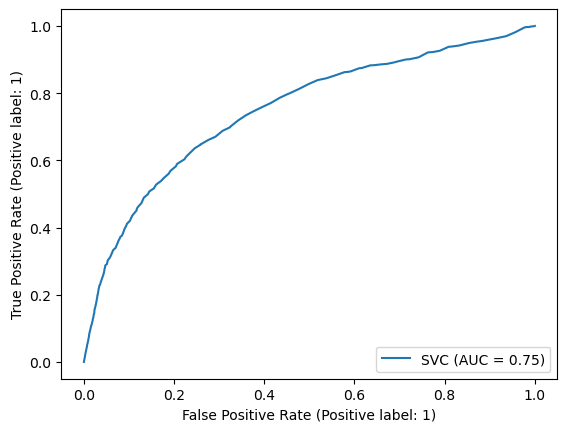

In [185]:
metrics.RocCurveDisplay.from_estimator(svm_rbf, X_reduced_test, y_test)

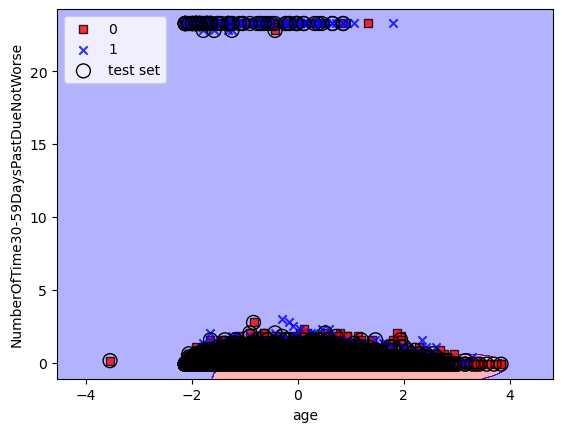

In [205]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm_rbf, test_idx=range(X_train_idx_end, len(X_combined_std)))

plt.xlabel(extracted_features.columns[0])
plt.ylabel(extracted_features.columns[1])
plt.legend(loc='upper left')
plt.show()

### Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [186]:
accuracy_tree = []
recall_tree = []
params_tree = {}

for i in np.arange(4, 11):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=42)
    tree.fit(X_reduced_train, y_train)
    y_pred = tree.predict(X_reduced_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    accuracy_tree.append(acc)
    recall_tree.append(recall)
    params_tree[(acc, recall)] = i

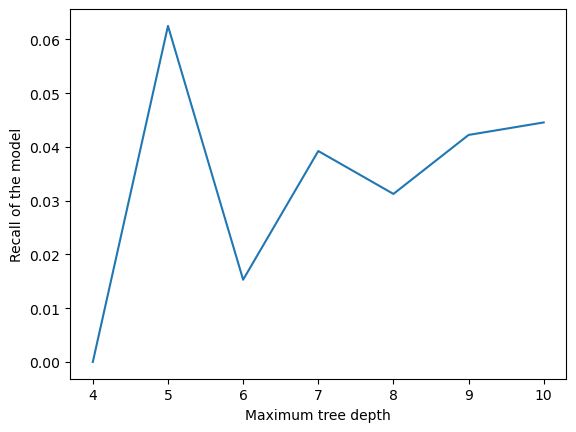

In [188]:
recall_df_tree = pd.DataFrame(recall_tree, index=np.arange(4, 11))
fig, ax = plt.subplots()
plt.xlabel('Maximum tree depth')
plt.ylabel('Recall of the model')
recall_df_tree.plot(ax=ax)
plt.legend().set_visible(False)
plt.show()

Note that the recall is almost as lousy as that of the logistic regression, but I still train the best one (`max_depth`=5) and use it to do predictions.

In [189]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_model.fit(X_reduced_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [190]:
y_pred = tree_model.predict(X_reduced_test)

In [191]:
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall: {}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.9329555555555555
Recall: 0.0625


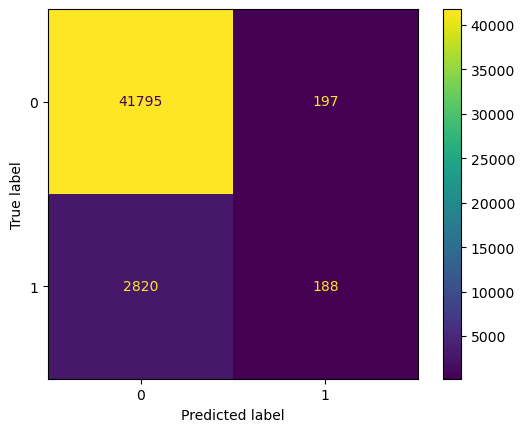

In [192]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

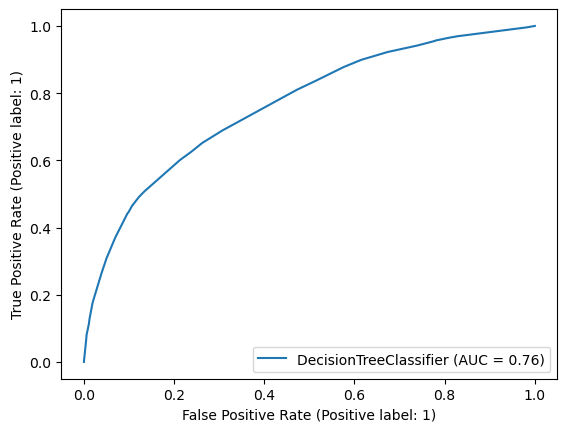

In [193]:
metrics.RocCurveDisplay.from_estimator(tree_model, X_reduced_test, y_test)

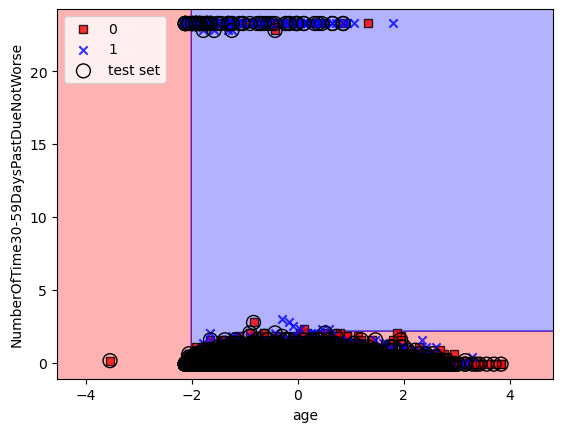

In [194]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=tree_model, test_idx=range(X_train_idx_end, len(X_combined_std)))

plt.xlabel(extracted_features.columns[0])
plt.ylabel(extracted_features.columns[1])
plt.legend(loc='upper left')
plt.show()

### Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
accuracy_forest = []
recall_forest = []
params_forest = {}

n_estimators = [10, 20, 50, 100, 500, 1000, 2000, 5000]

for max_depth in np.arange(4, 11):
    for n in n_estimators:
        forest = RandomForestClassifier(criterion='gini', max_depth=max_depth, n_estimators=n, random_state=42, n_jobs=8)
        forest.fit(X_reduced_train, y_train)
        y_pred = forest.predict(X_reduced_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        accuracy_forest.append(acc)
        recall_forest.append(recall)
        params_forest[recall] = (max_depth, n)

In [208]:
print(params_forest)

max_depth, n = params_forest[max(recall_forest)]
print("Parameter pair with highest recall (max_depth, n_estimators): ({}, {})".format(max_depth, n))

{0.0: (4, 5000), 0.004654255319148936: (5, 10), 0.0019946808510638296: (5, 500), 0.0026595744680851063: (5, 5000), 0.028590425531914893: (6, 10), 0.007646276595744681: (6, 20), 0.018949468085106384: (6, 50), 0.015292553191489361: (6, 100), 0.01363031914893617: (6, 500), 0.011968085106382979: (6, 2000), 0.00997340425531915: (6, 5000), 0.02127659574468085: (7, 10), 0.0199468085106383: (7, 20), 0.02327127659574468: (7, 50), 0.020944148936170214: (7, 5000), 0.022606382978723406: (7, 500), 0.02160904255319149: (7, 1000), 0.030252659574468085: (9, 5000), 0.0269281914893617: (8, 20), 0.026595744680851064: (8, 5000), 0.02726063829787234: (8, 100), 0.028257978723404256: (8, 500), 0.02759308510638298: (8, 2000), 0.03125: (9, 10), 0.0355718085106383: (9, 20), 0.036569148936170214: (9, 50), 0.0339095744680851: (9, 100), 0.032579787234042555: (9, 500), 0.032247340425531915: (9, 1000), 0.02925531914893617: (9, 2000), 0.03789893617021277: (10, 10), 0.04089095744680851: (10, 20), 0.0382313829787234: (

Note that the recall here is also very dissatisfactory, so I'll just treat the random forest model as a trial.

In [209]:
forest = RandomForestClassifier(criterion='gini', max_depth=max_depth, n_estimators=n, random_state=42, n_jobs=8)
forest.fit(X_reduced_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=8,
                       random_state=42)

In [210]:
y_pred = forest.predict(X_reduced_test)

In [211]:
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall: {}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.9333555555555556
Recall: 0.04222074468085106


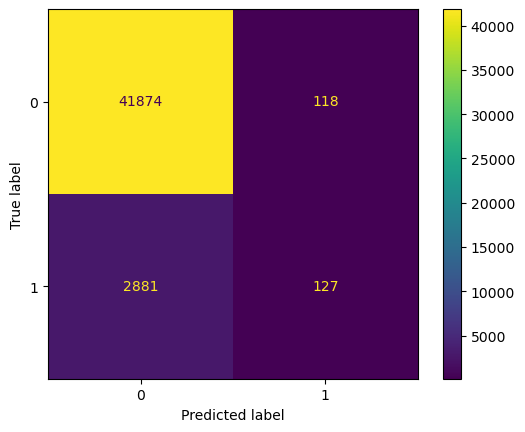

In [212]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

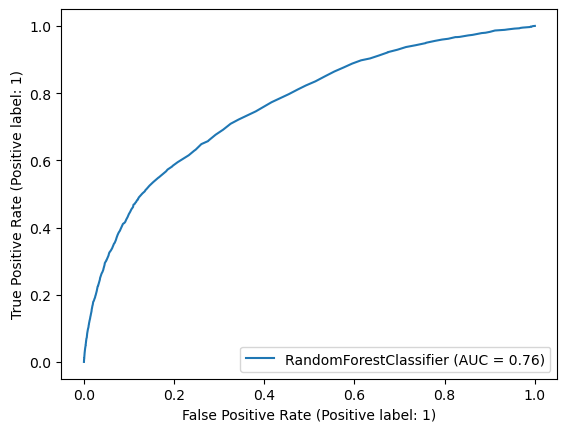

In [213]:
metrics.RocCurveDisplay.from_estimator(forest, X_reduced_test, y_test)

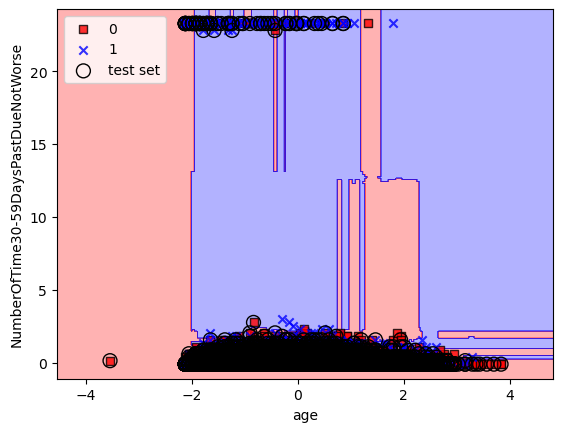

In [214]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=forest, test_idx=range(X_train_idx_end, len(X_combined_std)))

plt.xlabel(extracted_features.columns[0])
plt.ylabel(extracted_features.columns[1])
plt.legend(loc='upper left')
plt.show()

A final comment on these different models: although the recall of some models are quite low, all of these models except for logistic regression give not bad AUC ROC, so maybe varying the classification threshold would yield better models. However, since the dataset is highly imbalanced, the accuracy is fairly high in all models.

## Prediction

Finally, we use the best model above to do prediction using the data from `test.csv`.

In [235]:
test_df_X = pd.read_csv("../data/cs-test.csv", index_col=0).iloc[:, 1:]
test_df_y = pd.read_csv("../data/sampleEntry.csv", index_col=0)

In [236]:
test_std_X = test_df_X.loc[:, weights[non_zero_weight_idx[0][0]] != 0]
test_std_X = sc2.transform(test_std_X)

In [237]:
test_df_y.head()

,Probability
Id,
1,0.080807
2,0.040719
3,0.011968
4,0.067640
5,0.108264


In [238]:
test_df_y.loc[test_df_y['Probability'] >= 0.5, :] = 1
test_df_y.loc[test_df_y['Probability'] < 0.5, :] = 0

In [239]:
test_array_y = test_df_y['Probability'].astype(int)

### Logistic Regression

In [241]:
y_pred = lr.predict(test_std_X)

In [242]:
print("Accuracy: {}".format(metrics.accuracy_score(test_array_y, y_pred)))
print("Recall: {}".format(metrics.recall_score(test_array_y, y_pred)))

Accuracy: 0.9836359516467493
Recall: 0.07565982404692081


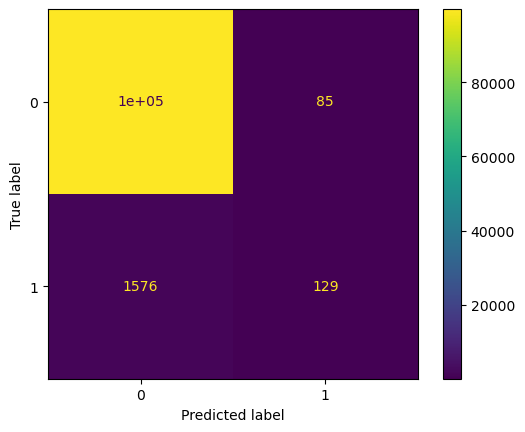

In [243]:
metrics.ConfusionMatrixDisplay.from_predictions(test_array_y, y_pred)

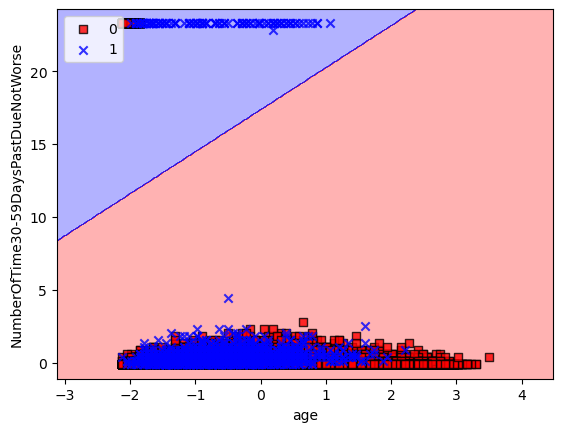

In [240]:
plot_decision_regions(test_std_X, test_array_y, classifier=lr)
plt.xlabel(extracted_features.columns[0])
plt.ylabel(extracted_features.columns[1])
plt.legend(loc='upper left')
plt.show()

### SVM with linear kernel

In [244]:
y_pred = svm_lin.predict(test_std_X)

In [245]:
print("Accuracy: {}".format(metrics.accuracy_score(test_array_y, y_pred)))
print("Recall: {}".format(metrics.recall_score(test_array_y, y_pred)))

Accuracy: 0.5188221037801838
Recall: 0.7648093841642228


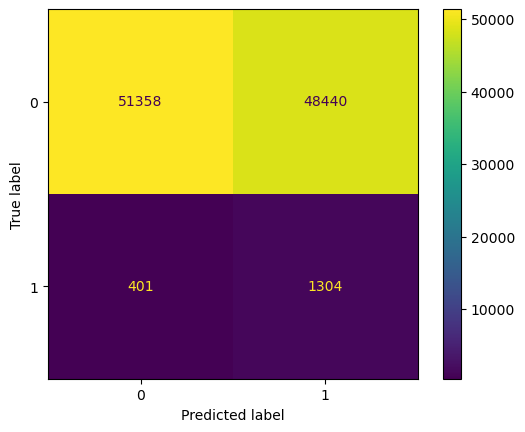

In [246]:
metrics.ConfusionMatrixDisplay.from_predictions(test_array_y, y_pred)

In [247]:
plot_decision_regions(test_std_X, test_array_y, classifier=svm_lin)
plt.xlabel(extracted_features.columns[0])
plt.ylabel(extracted_features.columns[1])
plt.legend(loc='upper left')
plt.show()

KeyboardInterrupt: 

### SVM with `rbf` kernel

In [259]:
y_pred = svm_rbf.predict(test_std_X)

In [260]:
print("Accuracy: {}".format(metrics.accuracy_score(test_array_y, y_pred)))
print("Recall: {}".format(metrics.recall_score(test_array_y, y_pred)))

Accuracy: 0.7445691260356837
Recall: 0.881524926686217


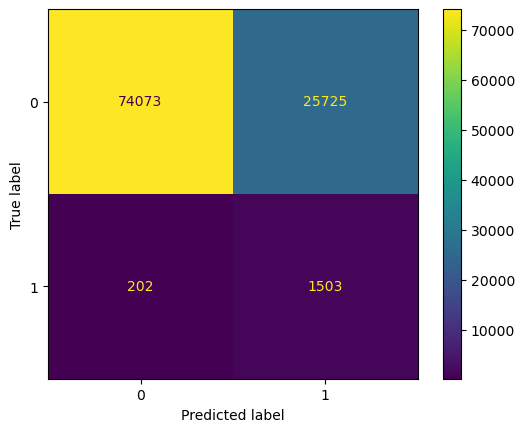

In [261]:
metrics.ConfusionMatrixDisplay.from_predictions(test_array_y, y_pred)

In [ ]:
plot_decision_regions(test_std_X, test_array_y, classifier=svm_rbf)
plt.xlabel(extracted_features.columns[0])
plt.ylabel(extracted_features.columns[1])
plt.legend(loc='upper left')
plt.show()

### Decision Tree

In [262]:
y_pred = tree_model.predict(test_std_X)

In [263]:
print("Accuracy: {}".format(metrics.accuracy_score(test_array_y, y_pred)))
print("Recall: {}".format(metrics.recall_score(test_array_y, y_pred)))

Accuracy: 0.9820990512595686
Recall: 0.20762463343108503


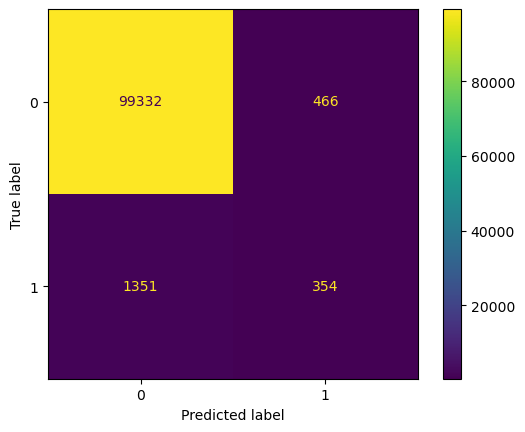

In [264]:
metrics.ConfusionMatrixDisplay.from_predictions(test_array_y, y_pred)

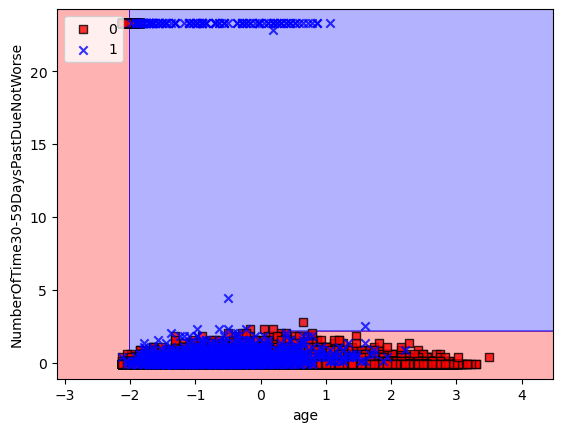

In [265]:
plot_decision_regions(test_std_X, test_array_y, classifier=tree_model)
plt.xlabel(extracted_features.columns[0])
plt.ylabel(extracted_features.columns[1])
plt.legend(loc='upper left')
plt.show()

### Random Forest

In [255]:
y_pred = forest.predict(test_std_X)

In [256]:
print("Accuracy: {}".format(metrics.accuracy_score(test_array_y, y_pred)))
print("Recall: {}".format(metrics.recall_score(test_array_y, y_pred)))

Accuracy: 0.9822271262918337
Recall: 0.12434017595307918


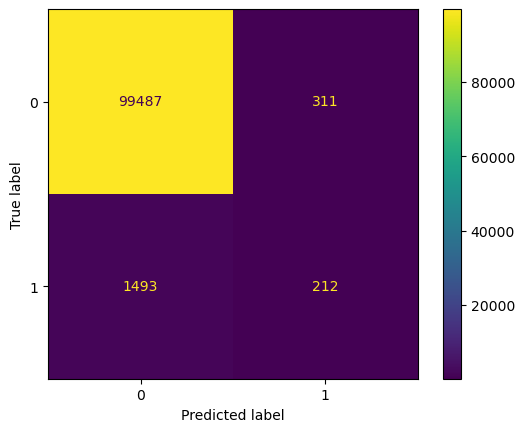

In [257]:
metrics.ConfusionMatrixDisplay.from_predictions(test_array_y, y_pred)

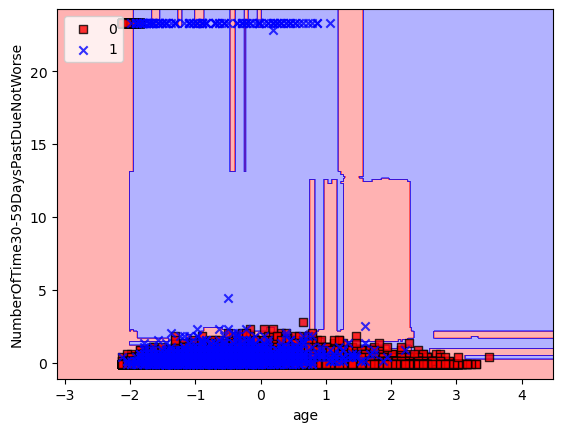

In [258]:
plot_decision_regions(test_std_X, test_array_y, classifier=forest)
plt.xlabel(extracted_features.columns[0])
plt.ylabel(extracted_features.columns[1])
plt.legend(loc='upper left')
plt.show()